<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-Background-Information" data-toc-modified-id="Dataset-Background-Information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset Background Information</a></span></li><li><span><a href="#Preliminary-Questions" data-toc-modified-id="Preliminary-Questions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preliminary Questions</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Process-Data" data-toc-modified-id="Process-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Process Data</a></span></li><li><span><a href="#Explore-Data" data-toc-modified-id="Explore-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Explore Data</a></span></li><li><span><a href="#Investigate" data-toc-modified-id="Investigate-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Investigate</a></span></li></ul></div>

Describe your dataset. Describe and explore your dataset in the initial section of your Report. 

Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.

See this recent analysis on 2016 celebrity deaths for an excellent example of data-driven story telling that presents a problem, explores data, and produces an answer. The analytics are more robust techniques than we've covered so far, but the general idea and tone are spot on.

Report guidelines
Keep these guidelines in mind as you draft your Report:

Length. Your Report should be three to five pages long with visualizations. Short and clear is better than long and opaque.
Structure. Pay attention to the narrative structure of your Report. Each section should flow into the next and make a logical, readable text. Don't simply create a list of bullet points or present code without explanation.


Once you've loaded your data, dig around with pandas and matplotlib to explore it. What variables does your data contain and what distributions do you think they have? Does the data bear on the preliminary questions you wrote down? What new questions might you answer? How does the data look when you plot it out?

At this point you should be ready to start writing your Report. Decide what format to use, which three analytic questions you'll ask and answer, which research questions you'd like to ask and which data science techniques might be appropriate to answering them. If necessary, do independent research now about the field of data science, or discuss the topic with your mentor, to decide which potential techniques you could use.

Use at least 2-3 different types of charts to display the data.
Be clear about any assumptions you make about the data and validate those assumptions if possible.
Ensure that your dataset actually has the information to answer the questions you're asking. Does the dataset have a bias? Is it incomplete? Problems with your dataset can easily lead to problems in your analysis if you don't address them.
Assignment
When you're ready, submit your final Report at the bottom of this page. Try to have a final discussion with your mentor about your work before you present your capstone.

# Dataset Background Information

What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

"Young People Survey," is the title of the dataset I investigated. The author of this dataset, Miroslav Sabo, created this 2013 dataset that documented 1,010 people's answers to a 150 question survey. As said in the title, the population of this survey revolved around younger people specifically between the ages of 15 and 30 inclusive. The survey questions are broken up into 9 categories: Music preferences, Movie preferences, Hobbies & interests, Phobias, Health habits, Personality traits, views on life & opinions, Spending habits, and Demographics.

The personality traits section of the survey sparked my interest to investigate this dataset. Some of the questions were very personal and are likely to be seen on a mental health survey. Here are some examples: "I wish I could change the past because of the things I have done. I will find a fault in myself if people don't like me. I feel lonely in life." I was curious to find out if there are any similarities between people who answered yes to these personal questions. This ultimately lead me to my first preliminary question.


# Preliminary Questions

What do lonely people generally have in common?

Are people in the city more lonely than people in rural areas?

Is there a correlation between loneliness and internet usauge?


# Imports

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from collections import Counter
import seaborn as sns
%matplotlib inline

In [115]:
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150

In [116]:
col_data = pd.read_csv('young-people-survey/columns.csv')
response_data = pd.read_csv('young-people-survey/responses.csv')

In [117]:
response_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

# Process Data

In [118]:
features_to_remove = ['Left - right handed', 'Education', 
                      'House - block of flats', 'Number of siblings', 
                      'Questionnaires or polls', 'Pets', 'Flying',
                      'Storm','Darkness','Heights','Spiders','Snakes',
                      'Rats','Ageing','Dangerous dogs','Fear of public speaking']
response_data.drop(features_to_remove, axis = 1, inplace = True)
print("Columns: {}".format(len(response_data.columns)))

Columns: 134


# Explore Data

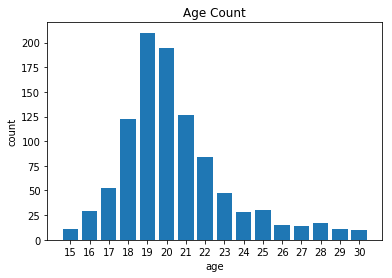

In [119]:
age = response_data.Age.value_counts().keys()
age = list(np.int_(age))
age_count = response_data.Age.value_counts().values

plt.bar(age, age_count)
plt.title('Age Count')
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(age)
plt.show()

In [120]:
mental_health_df = response_data.copy()

mental_health_df.drop(response_data.select_dtypes(['object','int64']), axis = 1, inplace = True)
non_mental_col = ['Music', 'Slow songs or fast songs', 'Dance',
 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 
 'Latino', 'Techno, Trance', 'Opera', 'Movies','Horror', 'Thriller', 'Comedy', 'Romantic',
 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary','Western', 'Action', 'History',
 'Psychology', 'Politics', 'Mathematics', 'Physics', 'PC', 'Economy Management', 'Biology', 'Chemistry',
 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Finding lost valuables',
 'Science and technology', 'Passive sport', 'Daily events']
mental_health_df.drop(non_mental_col, axis = 1, inplace = True)

In [121]:
#make bar plot with corr with loneliness

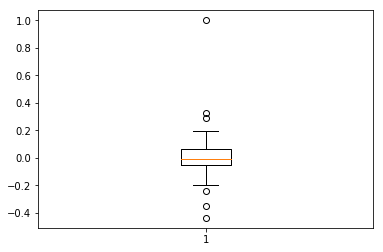

In [122]:
#correlation between loneliness and other features

corr = pd.DataFrame(mental_health_df.corr())

plt.boxplot(corr.Loneliness)
plt.show()

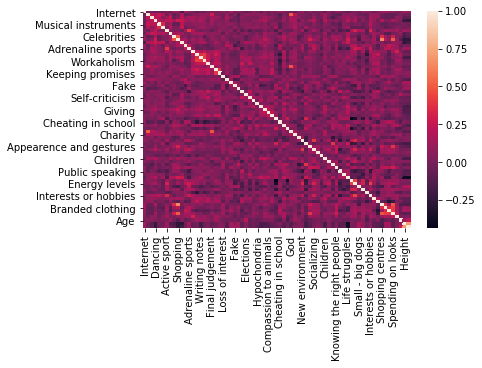

In [123]:
sns.heatmap(mental_health_df.corr())

# Investigate

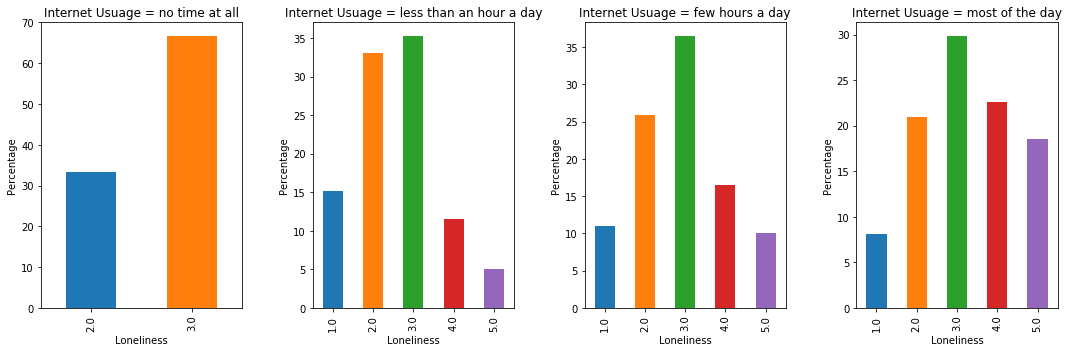

In [124]:
response_data['internet_usage'] = response_data['Internet usage']

internet_use_map = {'no time at all': 1,
                    'less than an hour a day': 2,
                    'few hours a day': 3,
                    'most of the day': 4}

inv_internet_map = {v: k for k,v in internet_use_map.items()}
response_data['internet_use_code'] = response_data.internet_usage.map(internet_use_map)


plt.figure(figsize=(15,5))

for num in range(1,5):
    #response_data.reindex(,fill_value=0)
    lonely = response_data.loc[response_data['internet_use_code'] == num,
                               'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,4,num)
    plt.title('Internet Usuage = ' + str(inv_internet_map[num]))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')


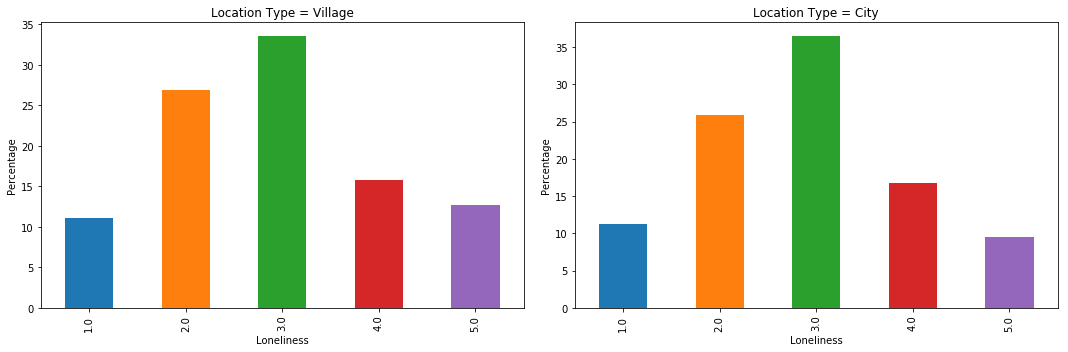

In [125]:
plt.figure(figsize=(15,5))
location_mapping = {'village': 1,
                    'city': 2}
response_data['location_num'] = response_data['Village - town'].map(location_mapping)
for num in range(1,3):
    lonely = response_data.loc[response_data['location_num'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,2,num)
    if num == 1:
        plt.title("Location Type = Village")
    else:
        plt.title("Location Type = City")
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

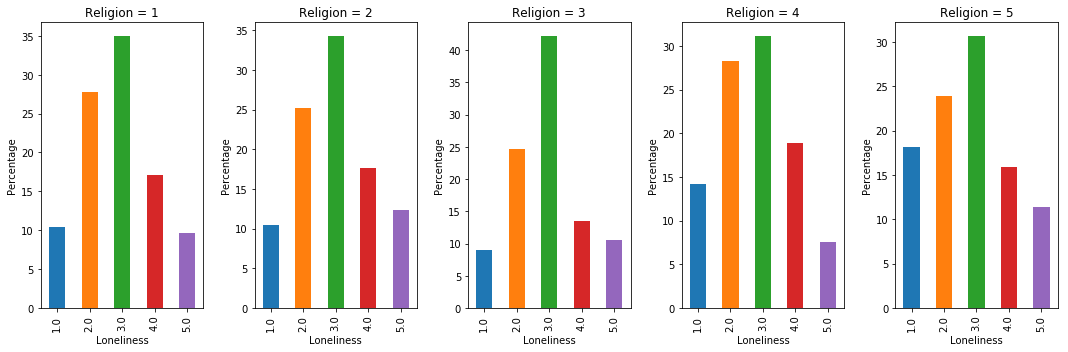

In [126]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Religion'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Religion = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

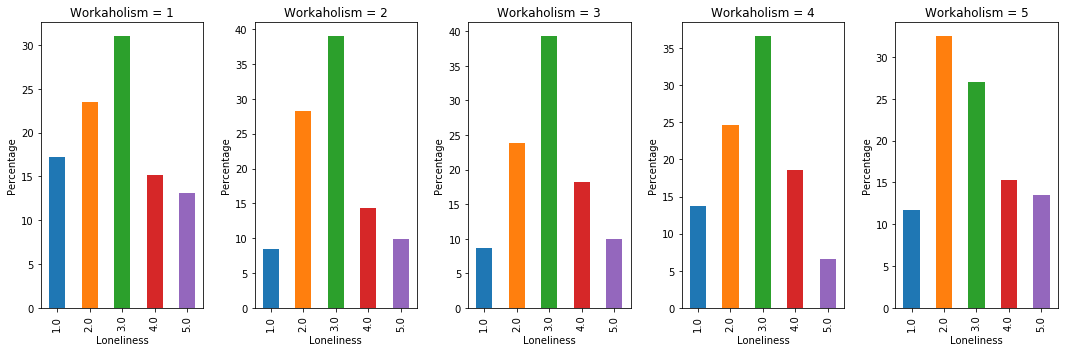

In [127]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Workaholism'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Workaholism = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

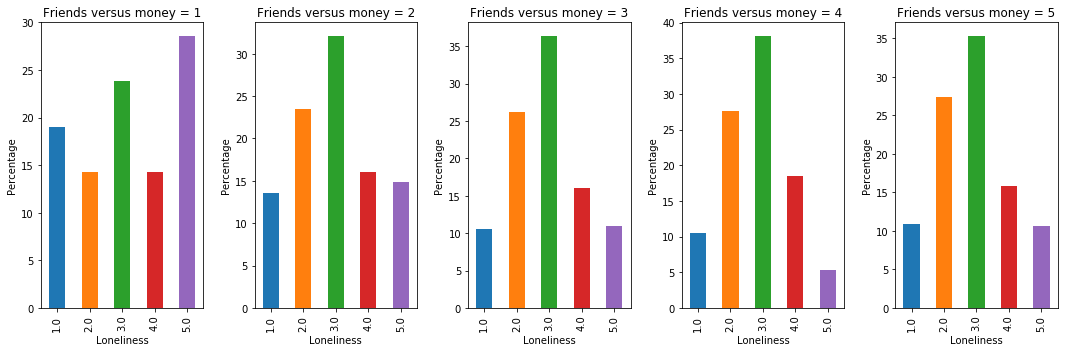

In [128]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Friends versus money'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Friends versus money = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

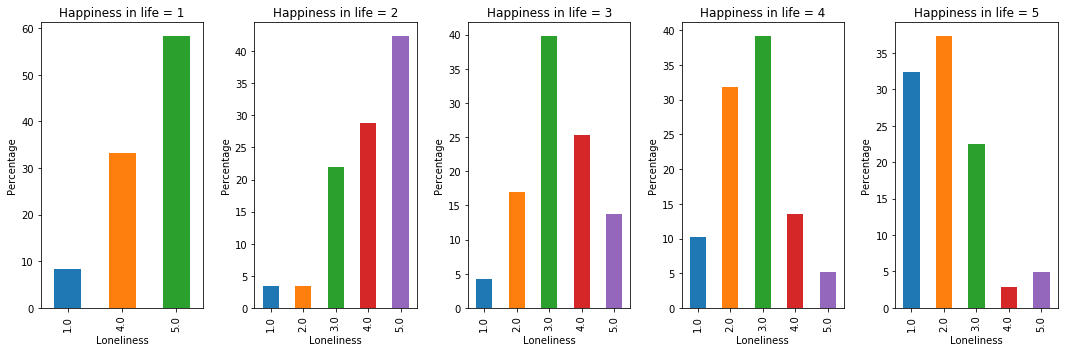

In [129]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Happiness in life'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Happiness in life = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

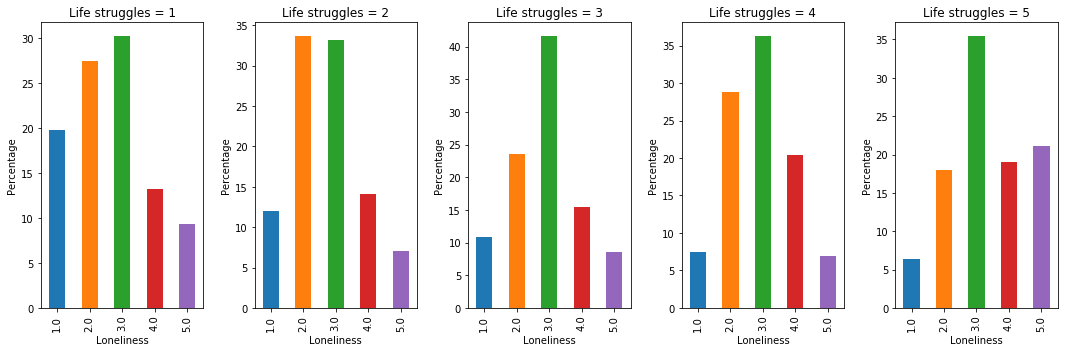

In [130]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Life struggles'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Life struggles = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

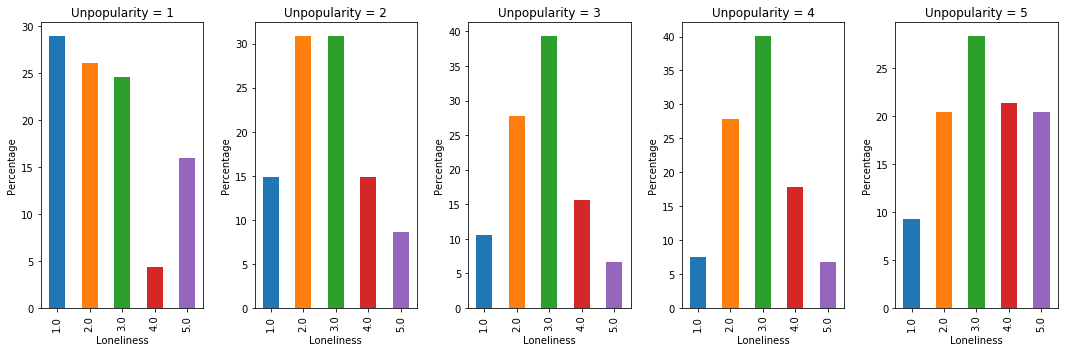

In [131]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Unpopularity'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Unpopularity = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

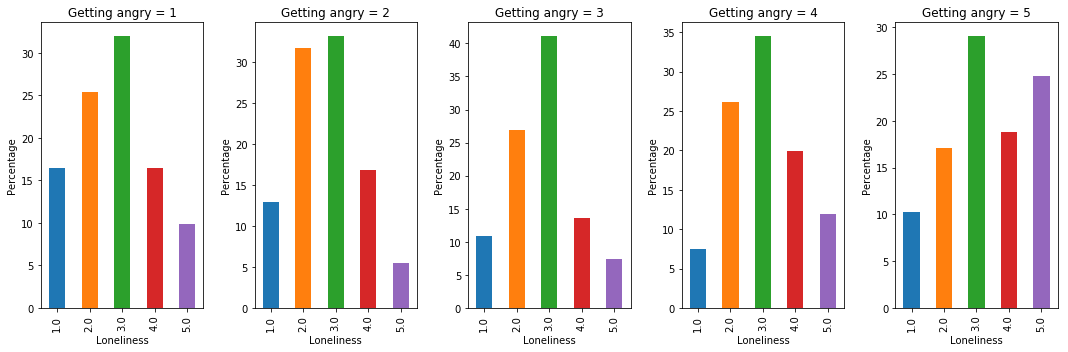

In [132]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Getting angry'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Getting angry = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

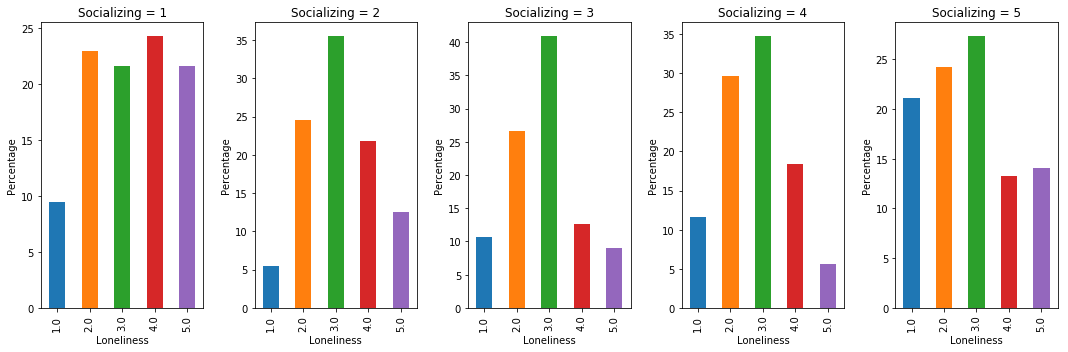

In [133]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Socializing'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Socializing = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

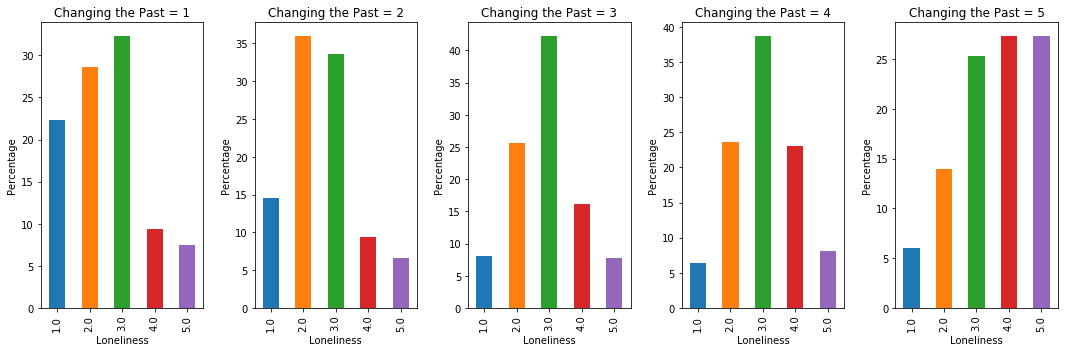

In [134]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Changing the past'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Changing the Past = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

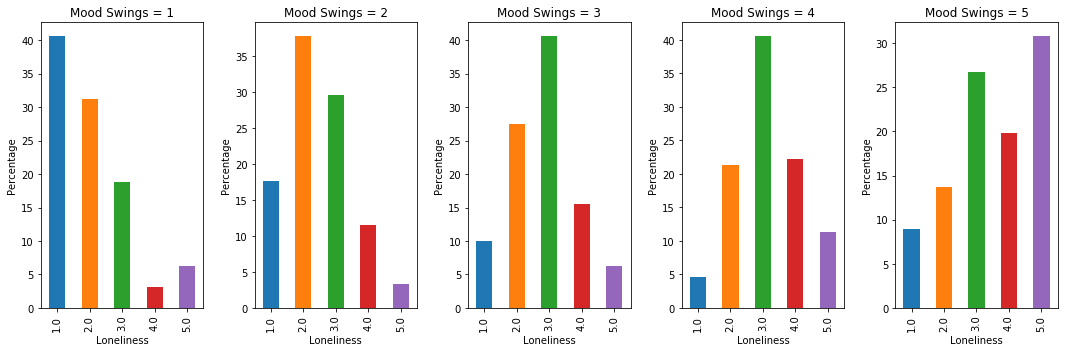

In [135]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Mood swings'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Mood Swings = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

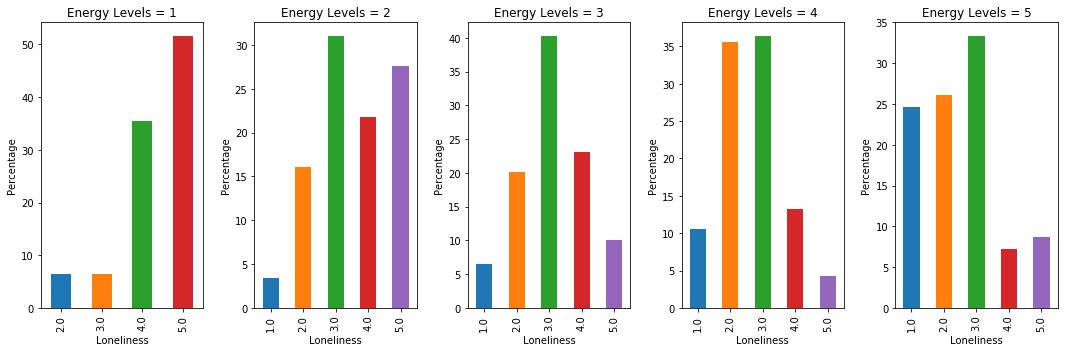

In [136]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Energy levels'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Energy Levels = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

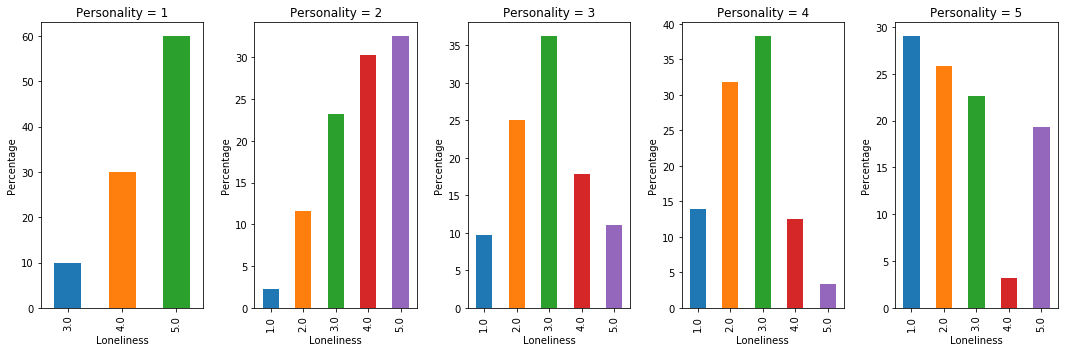

In [137]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Personality'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Personality = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

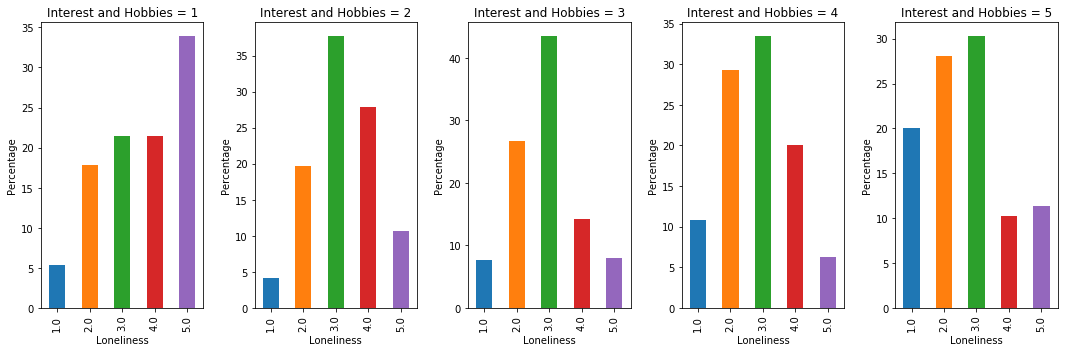

In [138]:
# Prompt: I have many hobbies and interest

plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Interests or hobbies'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Interest and Hobbies = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

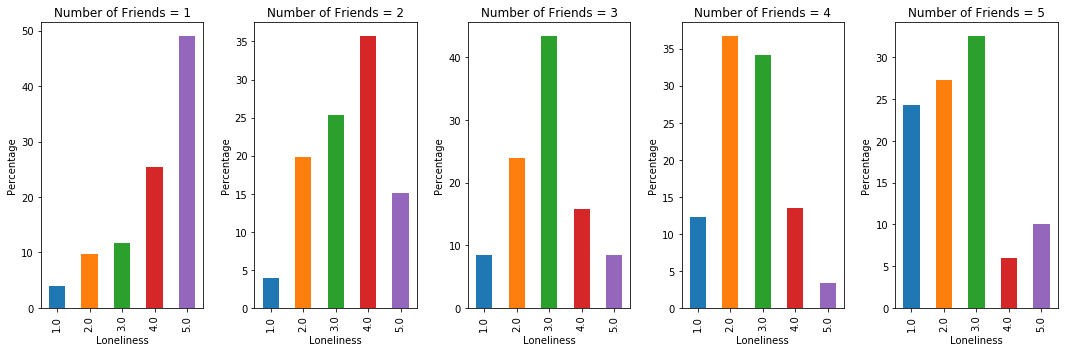

In [139]:
# Prompt: I have many hobbies and interest

plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Number of friends'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Number of Friends = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

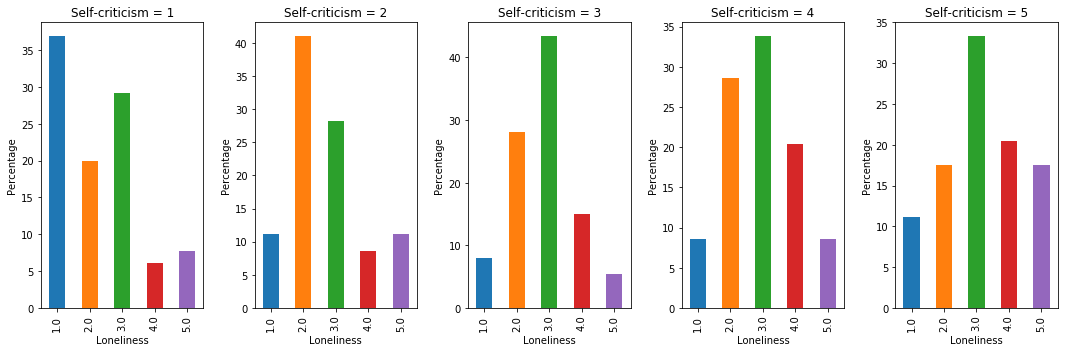

In [140]:
plt.figure(figsize=(15,5))
for num in range(1,6):
    lonely = response_data.loc[response_data['Self-criticism'] == num, 'Loneliness'].groupby(response_data['Loneliness']).count()
    lonely = lonely / sum(lonely) * 100
    plt.subplot(1,5,num)
    plt.title("Self-criticism = " + str(num))
    plt.ylabel('Percentage')
    plt.tight_layout()
    lonely.plot(kind = 'bar')

In [141]:
very_lonely = mental_health_df.loc[mental_health_df['Loneliness'] == 5].copy()

#very_lonely.fillna(0, inplace = True)

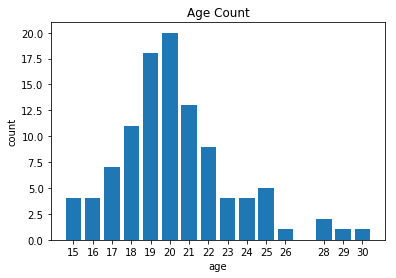

In [142]:
very_lonely_age = very_lonely.Age.value_counts().keys()
very_lonely_age = list(np.int_(very_lonely_age))
very_lonely_age_count = very_lonely.Age.value_counts().values

plt.bar(very_lonely_age, very_lonely_age_count)
plt.title('Age Count')
plt.xlabel('age')
plt.ylabel('count')
plt.xticks(very_lonely_age)
plt.show()

In [143]:
very_lonely.head()

,Internet,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Active sport,Gardening,Celebrities,Shopping,Theatre,Fun with friends,Adrenaline sports,Healthy eating,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Charity,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Getting up,Interests or hobbies,Parents' advice,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on healthy eating,Age,Height,Weight
2,4.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,5.0,5.0,5.0,3.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,3.0,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,5.0,3.0,2.0,4.0,1.0,4.0,3.0,2.0,20.0,176.0,67.0
3,3.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,4.0,1.0,2.0,1.0,3.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,3.0,1.0,1.0,5.0,3.0,1.0,3.0,3.0,2.0,5.0,5.0,4.0,5.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,NaN,2.0,2.0,4.0,3.0,3.0,4.0,1.0,22.0,172.0,59.0
12,3.0,1.0,5.0,3.0,4.0,1.0,3.0,4.0,3.0,2.0,2.0,4.0,1.0,3.0,3.0,5.0,4.0,5.0,1.0,5.0,5.0,4.0,4.0,3.0,1.0,2.0,5.0,5.0,5.0,2.0,5.0,5.0,2.0,5.0,5.0,5.0,2.0,5.0,3.0,1.0,2.0,2.0,1.0,4.0,4.0,2.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0,2.0,5.0,4.0,3.0,4.0,3.0,3.0,2.0,4.0,4.0,1.0,1.0,2.0,3.0,3.0,24.0,168.0,55.0
48,4.0,2.0,4.0,5.0,2.0,1.0,4.0,2.0,2.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,4.0,3.0,3.0,5.0,5.0,3.0,2.0,3.0,4.0,2.0,2.0,5.0,5.0,5.0,1.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,2.0,1.0,2.0,3.0,4.0,3.0,4.0,4.0,3.0,1.0,3.0,5.0,3.0,5.0,3.0,5.0,2.0,4.0,5.0,4.0,4.0,1.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,20.0,171.0,70.0
56,4.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,4.0,5.0,2.0,3.0,3.0,3.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0,3.0,2.0,2.0,5.0,3.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,1.0,1.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,5.0,3.0,5.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0,3.0,20.0,170.0,64.0


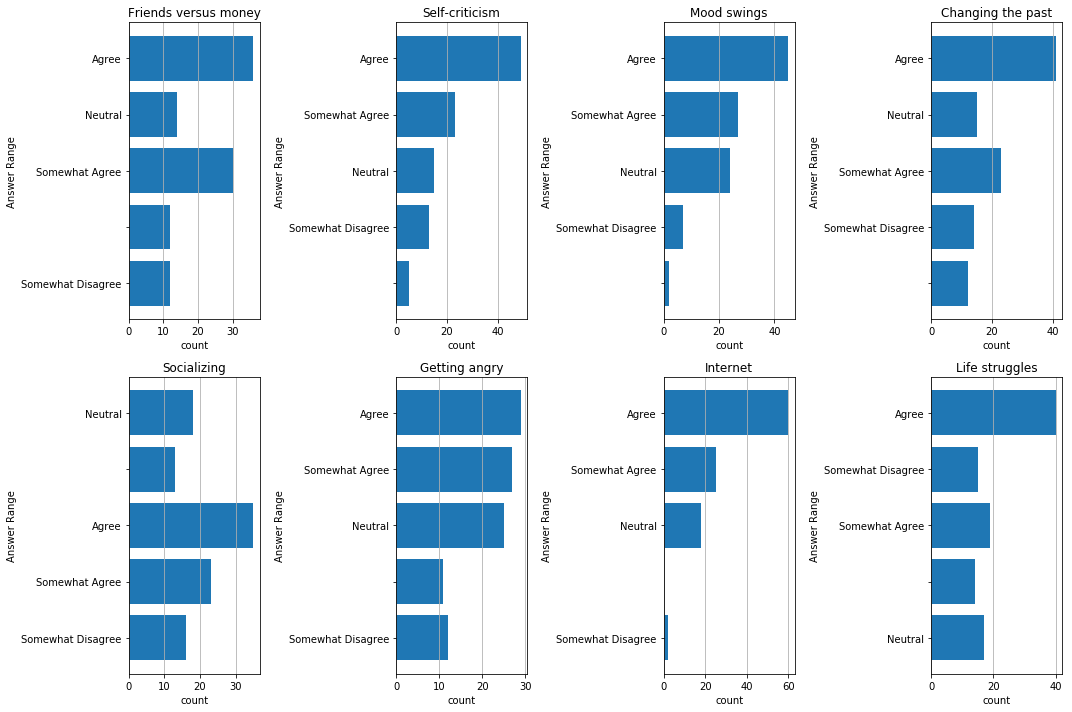

In [181]:
columns_plot = ['Interests or hobbies', 'Friends versus money', 'Self-criticism', 'Mood swings', 'Changing the past', 'Socializing', 'Getting angry', 'Internet', 'Life struggles']
labels = ['Agree', 'Somewhat Agree', 'Neutral', 'Somewhat Disagree', 'Disagree']

plt.figure(figsize=(15,10))

for num in range(1, len(columns_plot)):
    col_range = very_lonely[columns_plot[num]].value_counts().keys()
    #very_lonely_age = list(np.int_(very_lonely_age))
    col_count = very_lonely[columns_plot[num]].value_counts().values
        
    plt.subplot(2, 4, num)
    plt.barh(col_range, col_count)
    plt.title(str(columns_plot[num]))
    plt.ylabel('Answer Range')
    plt.xlabel('count')
    plt.yticks(col_range, labels=labels[:-1])
    plt.tight_layout()
    plt.grid(True, axis = 'x')
plt.show()

Questions for Mentor Meeting:
